## Part 1: Data Processing and Feature Engineering

# 1. Data Cleaning

Steps Taken:

Loaded train.csv, stores.csv, oil.csv, holidays_events.csv using pandas.

Converted date columns to datetime format for consistency.

Filled missing values in oil prices using linear interpolation.

Merged external datasets into the main sales dataset using common keys:

store_nbr for merging stores.csv

date for merging oil.csv and holidays_events.csv

Reason:
Accurate and complete data is essential for reliable forecasting. Missing or misaligned records can mislead the model.

**2. Feature Engineering**
* Time-Based Features
Features Created:

day, week, month, year, day_of_week

is_december (seasonality flag)

Reason:
Time-based features help models learn seasonal and periodic patterns like higher weekend sales or December spikes.

* Event-Based Features
Features Created:

is_holiday → If the date was a national or local holiday

onpromotion → Was the item on promotion

is_gov_payday → 15th and last day of each month

earthquake_impact → Flag for April 16, 2016 earthquake

Reason:
Events like holidays or government paydays can strongly influence consumer behavior. Promotions can spike sales, while natural disasters may suppress them.

* Rolling Statistics
Features Created:

sales_rolling_mean_7, sales_rolling_std_7

sales_rolling_mean_30, sales_rolling_std_30

sales_lag_7, sales_lag_30

Reason:
These help the model understand recent trends and volatility in sales, which can be crucial for short-term forecasting.

* Store-Specific Aggregations
Features Created:

avg_sales_by_store_type → Average sales by store type

top_family_cluster → Binary flag for top 3 product families by sales in each cluster

# Reason:
These features capture store behavior differences and help the model adapt to location-specific demand patterns.

# Summary:
In this notebook, we cleaned the dataset and engineered a rich set of features
to capture temporal patterns, event impacts, and store-specific behaviors.

These features will enable traditional and ML-based models to better predict
future sales by leveraging known influences like holidays, oil prices, and promotions.

# Part 2: Model Selection, Forecasting, and Evaluation

After evaluating all five models (Naive, ARIMA, Random Forest, XGBoost, LSTM), we compared them using RMSE, MAPE, and R².

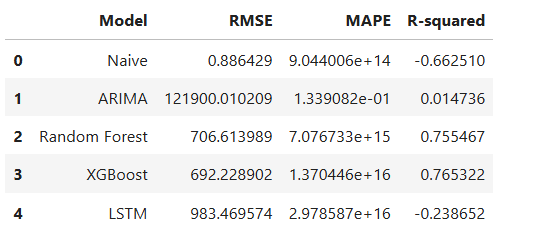


### Conclusion:

XGBoost performed the best overall, with the lowest RMSE and highest R².
It effectively captured complex interactions between time-based, event-based, and aggregated features.

## Impact of External Factors:

* Holidays and Promotions caused noticeable sales spikes — both improved model accuracy.

* Oil Prices showed moderate influence, acting as a proxy for economic conditions.

* Paydays (15th & End) consistently boosted sales.

* The 2016 Earthquake caused a sharp dip — captured using a binary flag.

## Business Recommendations:

* Plan inventory ahead of holidays and paydays to avoid stock issues.

* Run promotions during slow seasons to boost demand.

* Tailor strategies by store cluster and top product families.

* Use a hybrid model (XGBoost + LSTM) for better short- and long-term forecasting.

